In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
train = pd.read_csv("C:\\Users\\AJAY\\Amex\\train_amex\\train.csv")
test = pd.read_csv("C:\\Users\\AJAY\\Amex\\test_LNMuIYp\\test.csv")
print(train.shape,test.shape)

(463291, 15) (128858, 14)


In [13]:
train.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


In [14]:
train.apply(lambda x: len(x.unique()))

session_id                463291
DateTime                    8610
user_id                   150347
product                       10
campaign_id                   10
webpage_id                     9
product_category_1             5
product_category_2            30
user_group_id                 14
gender                         3
age_level                      8
user_depth                     4
city_development_index         5
var_1                          2
is_click                       2
dtype: int64

In [15]:
train.isnull().sum()

session_id                     0
DateTime                       0
user_id                        0
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
product_category_2        365854
user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
var_1                          0
is_click                       0
dtype: int64

In [25]:
# Finding Percentage of Null Values
miss_value_percent = 100*train.isnull().sum()/len(train)
miss_value_percent

session_id                 0.00000
DateTime                   0.00000
user_id                    0.00000
product                    0.00000
campaign_id                0.00000
webpage_id                 0.00000
product_category_1         0.00000
product_category_2        78.96851
user_group_id              0.00000
gender                     0.00000
age_level                  0.00000
user_depth                 0.00000
city_development_index     0.00000
var_1                      0.00000
is_click                   0.00000
dtype: float64

In [16]:
train['var_1'].value_counts()

0    267704
1    195587
Name: var_1, dtype: int64

In [17]:
train['is_click'].value_counts()

0    431960
1     31331
Name: is_click, dtype: int64

In [18]:
train['city_development_index'].value_counts()

2.0    147643
3.0     88709
4.0     67166
1.0     34644
Name: city_development_index, dtype: int64

In [19]:
train.fillna(value = {'user_group_id':2,'gender':'Male','age_level':3,'user_depth':3,'city_development_index':2},inplace = True)

In [20]:
test.fillna(value = {'user_group_id':2,'gender':'Male','age_level':3,'user_depth':3,'city_development_index':2},inplace = True)

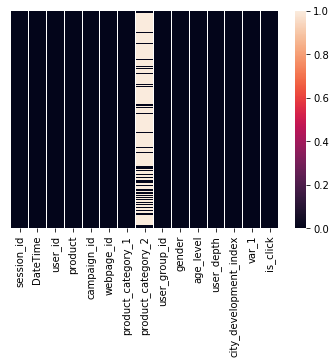

In [21]:
sns.heatmap(train.isnull(),yticklabels = False)

In [22]:
# Find co-relation among is_click 
corelation = train.corr()['is_click'].sort_values()
print("Most Positive Co-relation---\n",corelation.tail())
print("Most Negative Co-relation---\n", corelation.head())

Most Positive Co-relation---
 var_1                 0.011296
campaign_id           0.011447
product_category_2    0.019213
webpage_id            0.041717
is_click              1.000000
Name: is_click, dtype: float64
Most Negative Co-relation---
 product_category_1       -0.016531
session_id               -0.011598
age_level                -0.009403
user_group_id            -0.007814
city_development_index   -0.004748
Name: is_click, dtype: float64


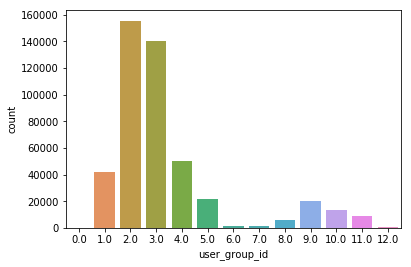

In [23]:
sns.countplot(x = "user_group_id", data = train)

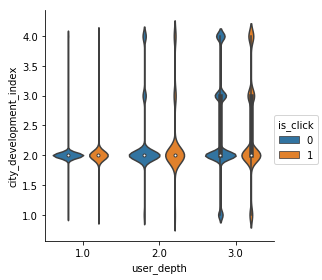

In [24]:
sns.factorplot(x ="user_depth",y ="city_development_index",hue = "is_click", kind = "violin" ,data = train)

In [26]:
train.drop(columns = ['DateTime','product_category_2'], axis = 1,inplace = True)

In [27]:
test.drop(columns = ['DateTime','product_category_2'], axis = 2,inplace = True)

In [28]:
train.dtypes

session_id                  int64
user_id                     int64
product                    object
campaign_id                 int64
webpage_id                  int64
product_category_1          int64
user_group_id             float64
gender                     object
age_level                 float64
user_depth                float64
city_development_index    float64
var_1                       int64
is_click                    int64
dtype: object

In [29]:
train = pd.get_dummies(train,columns = ['product','gender'])
test = pd.get_dummies(test,columns = ['product','gender'])

In [30]:
X_train = train.drop(['session_id','is_click'], axis = 1)
Y_train = train['is_click']
X_test = test.drop(['session_id'], axis = 1).copy()

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Log_Prediction = logreg.predict(X_test)

In [34]:
acc_score = round(logreg.score(X_train,Y_train)*100,2)
acc_score

93.24

In [36]:
Logistic_submission = pd.DataFrame({"session_id": test["session_id"]
                                   ,'is_click':Log_Prediction})
Logistic_submission.to_csv("Logist.csv", index = False)

In [37]:
from sklearn.ensemble import RandomForestClassifier
rndomforest = RandomForestClassifier(n_estimators = 75,n_jobs = 35,random_state = 8)

In [38]:
rndomforest.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=35,
            oob_score=False, random_state=8, verbose=0, warm_start=False)

In [39]:
rndom_Prediction = rndomforest.predict(X_test)
acc_score = round(rndomforest.score(X_train,Y_train)*100,2)
acc_score

97.64

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate = 0.4,n_jobs = 40, max_depth = 40,random_state = 10)
xgb.fit(X_train,Y_train) 

XGBClassifier(_jobs=40, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.4, max_delta_step=0,
       max_depth=40, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=10, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [41]:
xgb_predication =  xgb.predict(X_test)
acc_xgb = round(xgb.score(X_train,Y_train)*100,2)
acc_xgb

93.24

In [42]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train,Y_train)
Gradient_Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train)*100,2)
acc_sgd

93.24